## Initial Preparation

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mousedata = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mousedata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
micecount = mousedata["Mouse ID"].value_counts()
len(micecount)

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Ref: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html
duplicates = mousedata.duplicated(subset=["Mouse ID", "Timepoint"])

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
trues = mousedata.loc[duplicates == True]
trues

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
uniquedata = mousedata.loc[duplicates == False]

In [6]:
# Checking the number of mice in the clean DataFrame.
newmicecount = uniquedata["Mouse ID"].value_counts()
len(newmicecount)

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
uniquedata.groupby("Drug Regimen").agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

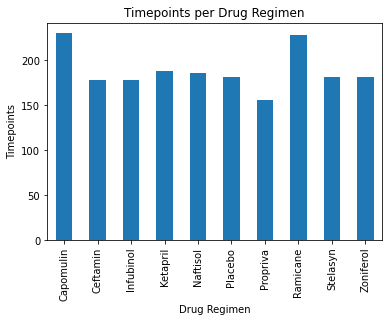

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
pointsperdrug = uniquedata.groupby("Drug Regimen")
count_drug = pointsperdrug["Drug Regimen"].count()

count_chart = count_drug.plot(kind="bar", title="Timepoints per Drug Regimen")
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Timepoints")

plt.show()

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


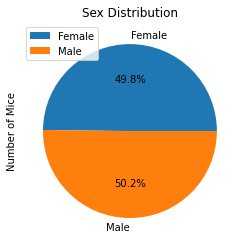

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
duplicatemice = uniquedata.duplicated(subset=["Mouse ID"])
permousedata = uniquedata.loc[duplicatemice == False]
gender = permousedata.groupby("Sex").count()

genderpie = gender.plot(kind="pie", y="Mouse ID", title="Sex Distribution", autopct='%1.1f%%')
genderpie.set_ylabel("Number of Mice")
genderpie.legend(loc="upper left")

plt.show()

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
LastTime = uniquedata.groupby("Mouse ID").max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
promising = pd.merge(uniquedata, LastTime, how="left", on=["Mouse ID", "Mouse ID"], suffixes=("", "max"))
maxpromise = promising.loc[promising["Timepoint"] == promising["Timepointmax"]]

In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
voldata = []
tumor_df = pd.DataFrame()
stats_df = pd.DataFrame(index=["Lower Quartile", "Upper Quartile", "IQR", "Lower Outlier Bound", "Upper Outlier Bound", "Potential Outliers"])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatments:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    for mouse in range(len(maxpromise["Mouse ID"])):
        if maxpromise.iloc[mouse, 1] == drug:
            voldata.append(maxpromise.iloc[mouse, 6])
    
    # add subset 
    tumor_df[drug] = voldata
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_df[drug].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    outliers = tumor_df.loc[(tumor_df[drug] < lowerbound) | (tumor_df[drug] > upperbound)]
    outliers = outliers.iloc[:,0].tolist()
    stats_df[drug] = [lowerq, upperq, iqr, lowerbound, upperbound, outliers]
    
    #Reset list variable
    voldata = []

stats_df

,Capomulin,Ramicane,Infubinol,Ceftamin
Lower Quartile,32.377357,31.56047,54.048608,48.722078
Upper Quartile,40.15922,40.659006,65.525743,64.29983
IQR,7.781863,9.098537,11.477135,15.577752
Lower Outlier Bound,20.704562,17.912664,36.832905,25.35545
Upper Outlier Bound,51.832015,54.306811,82.741446,87.666458
Potential Outliers,[],[],[31.8962384],[]


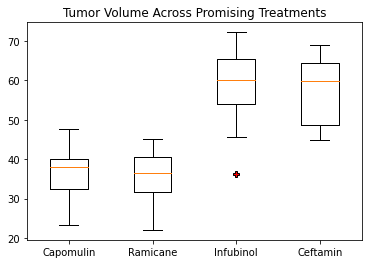

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax = plt.subplots()
ax.set_title("Tumor Volume Across Promising Treatments")
box = ax.boxplot(tumor_df, labels=treatments, flierprops=dict(markerfacecolor="r", marker="P"))

plt.show()

## Line and Scatter Plots

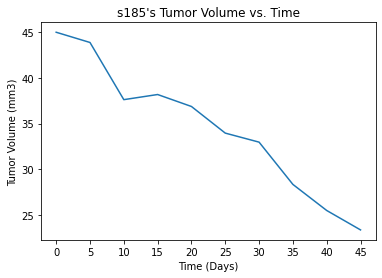

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulinonly = uniquedata.loc[uniquedata["Drug Regimen"] == "Capomulin"]
capID = capomulinonly.iloc[0,0]
capmouse = capomulinonly.loc[uniquedata["Mouse ID"] == capID]

plt.plot(capmouse["Timepoint"], capmouse["Tumor Volume (mm3)"])
plt.title(capID + "'s Tumor Volume vs. Time")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xticks(np.arange(0, 50, step=5))

plt.show()

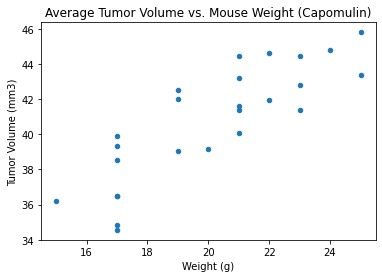

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avgtumor = capomulinonly.groupby("Mouse ID").mean()

avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight (Capomulin)")

plt.show()

## Correlation and Regression

The correlation between both factors is 0.84.
The linear regression equation is y = 0.95x + 21.55.


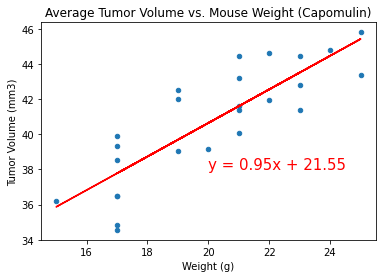

In [36]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouseweight = avgtumor.iloc[:,1]
tumorvolume = avgtumor.iloc[:,3]
correlation = st.pearsonr(mouseweight, tumorvolume)
print(f"The correlation between both factors is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(mouseweight, tumorvolume)
regress_values = mouseweight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation is {line_eq}.")

avgtumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", title="Average Tumor Volume vs. Mouse Weight (Capomulin)")
plt.plot(mouseweight, regress_values, "r-")
plt.annotate(line_eq, (20,38), fontsize=15,color="red")
plt.show()

## Observations and Insights